In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import operator
from pickle_functions import *
%matplotlib inline



## Analysing SACT Regimens

This notebook explores Systematic Anti-Cancer Treatment regimens. The number of regimens required for a given cancer is studied and the likely outcome has been identified. 

In [2]:
# Importing the data set
sact_tumour = pd.read_csv("simulacrum_release_v1.1.0/sim_sact_tumour.csv")
sact_regimen = pd.read_csv("simulacrum_release_v1.1.0/sim_sact_regimen.csv")




In [3]:
tumour_to_diagnosis = np.array(sact_tumour[['MERGED_TUMOUR_ID','PRIMARY_DIAGNOSIS']].values)
tumour_to_idc_map = {i[0]:i[1] for i in tumour_to_diagnosis}

In [4]:
count_series = sact_regimen['MERGED_TUMOUR_ID'].value_counts()
idc_bins = []

for count,tumour_id in zip(count_series.values,count_series.keys()):
    if type(tumour_to_idc_map[tumour_id]) == str:
        idc_bins.append([tumour_to_idc_map[tumour_id].upper(),count])

In [5]:
idc_bins = np.array(idc_bins)

regimens_by_cancer = {}

for i in idc_bins:
    
    if i[0] in regimens_by_cancer:
        regimens_by_cancer[i[0]].append(int(i[1]))
    else:
        regimens_by_cancer[i[0]] = [int(i[1])]
        


In [ ]:
# write_pickle(regimens_by_cancer,"regimens_by_cancer.pkl")

## Regimens by cancer

In [5]:
# regimens_by_cancer = load_pickle("regimens_by_cancer.pkl")

In [6]:
"""
In this section, a new dictionary is created with the three main cancers as keys and a list of the number of regimens
administered for each case as values.
"""

# Three main cancers studied are breast, prostate and non-melanoma skin
main_cancers = ['C44','C50','C61']
main_cancer_keys = {}
all_cancer_keys = list(regimens_by_cancer.keys())


for cancer in main_cancers:
    
    # Creates a list of the 4Char codes for the main cancers studied
    main_cancer_keys[cancer] = [sub_key for sub_key in all_cancer_keys if cancer in sub_key] 

main_cancer_regimens = {}

# Creates a list of the number of regimens applied for each main cancer and stores in a dictionary. 
for key,sub_keys in main_cancer_keys.items():
    
    reg = []
    for sub_key in sub_keys:
        reg += [i for i in regimens_by_cancer[sub_key]]
    
    main_cancer_regimens[key] = reg
        
    

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


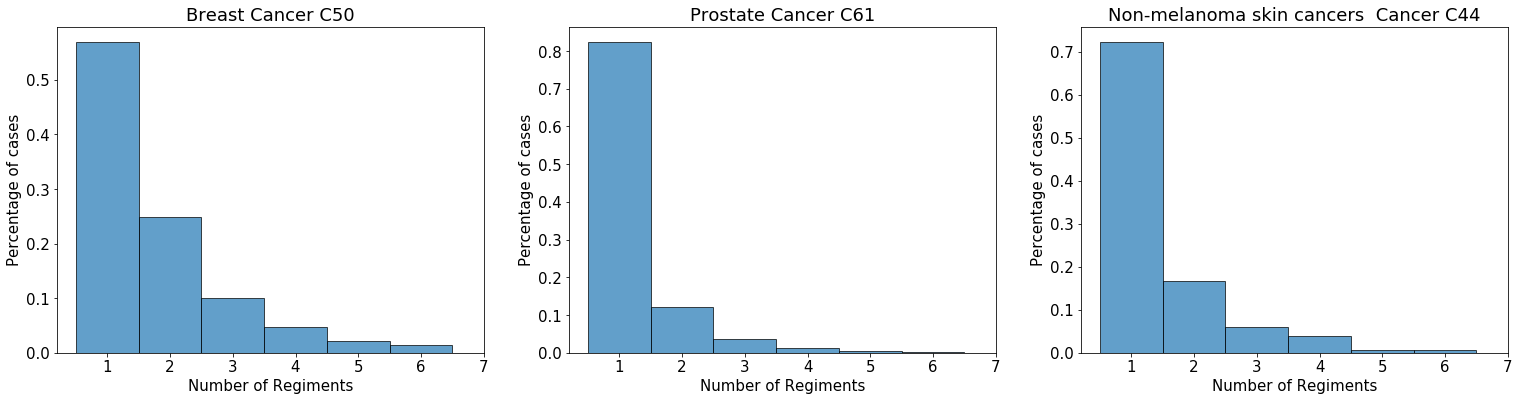

In [7]:
# Generate a bar plot showing the percentage of cases requiring a given number of regimens for the three main cancers

font = {'family' : 'helvetica',
        'size'   : 15}

matplotlib.rc('font', **font)

f, (ax1, ax2,ax3) = plt.subplots(1, 3)
f.set_size_inches(26,6)
binning = list(range(1,8))

ax1.set_title('Breast Cancer C50')
ax1.hist(main_cancer_regimens['C50'],bins = binning,edgecolor='black',alpha = 0.7,density=True)

ax2.set_title('Prostate Cancer C61')
ax2.hist(main_cancer_regimens['C61'],bins = binning,edgecolor='black',alpha = 0.7,density=True)

ax3.set_title('Non-melanoma skin cancers  Cancer C44')
ax3.hist(main_cancer_regimens['C44'],bins = binning,edgecolor='black',alpha = 0.7,density=True)


for ax in (ax1, ax2,ax3):
    ax.set_xlabel("Number of Regimens")
    ax.set_ylabel("Percentage of cases")
    
    ax.set_xticks([x_tick + 0.5 for x_tick in binning])
    ax.set_xticklabels([str(x) for x in binning])

f.savefig("cancer_by_regimens.png",dpi = 300)
